# 4: NumPy

<a href="https://nb.bohrium.dp.tech/detail/1814158988?utm_source=ck-github" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

NumPy是Python生态系统中的一个流行库，也是SciPy堆栈的关键组件。以至于NumPy甚至包含在苹果的Python默认安装和其他使用Python的应用程序中，如Blender。虽然使用NumPy的对象作为列表或完全绕过NumPy库可能很诱人，但花时间学习NumPy的强大功能是非常值得的！它通常能让你用更少的精力和时间解决问题，而且代码更短，执行速度更快。这归因于：

- NumPy自动将操作传播到数组中的所有值，而不需要for循环

- 大量用于处理数值数据的函数集合

- 许多NumPy的函数是Python包装的C代码，使它们运行速度更快

可以通过`import numpy`来导入NumPy包，但是科学Python社区已经开发了一个非官方但强烈的惯例，即使用`np`别名导入NumPy。使用别名与否是个人喜好的问题，但为了与社区其他部分保持一致，强烈建议使用别名。与`numpy.function()`相反，函数由较短的`np.function()`调用。本章及后续章节中所有的NumPy代码都假设如下导入。

In [2]:
import numpy as np

## 4.1 NumPy数组

NumPy的主要贡献之一是*ndarray*（即“n维数组”），*NumPy数组*或简称*数组*。这是一个类似于列表或嵌套列表的对象，除了数学运算和NumPy函数会自动传播到每个元素，而不是需要一个`for`循环来遍历它。由于它们的功能强大且方便，数组是使用NumPy执行的任何操作的默认对象类型，以及许多基于NumPy构建的科学库 (例如[SciPy](https://www.scipy.org/), [pandas](5), [scikit-learn](12), 等...).

### 4.1.1 基本数组

NumPy数组看起来像一个用`array()`包装的Python列表。它是一个可迭代对象，所以你*可以*用`for`循环遍历它，如果你真的想这样做的话。然而，由于NumPy会自动将操作传播到数组中，`for`循环通常是不必要的。例如，假设你想将一组数字乘以2。用列表来做这件事可能看起来像下面这样。

In [3]:
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for value in nums:
    print(2 * value)

0
2
4
6
8
10
12
14
16
18


与此相反，使用NumPy数组执行相同的操作只需将数组乘以2。

In [4]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(2 * arr)

[ 0  2  4  6  8 10 12 14 16 18]


### 4.1.2 转换为数组的类型

在本章开始时，我们将介绍生成NumPy数组的三种常见方法。第一种是简单地使用`np.array()`函数将列表或元组转换为数组。

In [5]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # list
arr = np.array(a)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

对象是ndarray的事实由`array()`表示。

### 4.1.3 从序列创建数组

我们还可以使用NumPy的序列生成函数创建数组。NumPy中有两个常用的函数来完成这个任务：`np.arange()`和`np.linspace()`。`np.arange()`函数的行为类似于原生Python的`range()`函数，关键区别在于它输出一个数组。另一个细微的区别是，`range()`生成一个范围对象，而`np.arange()`立即生成一系列值。`np.arange()`的参数类似于Python的`range()`函数，其中起始值是包含的，终止值是排除的，但与`range()`不同，`np.arange()`的步长不需要是整数值。

~~~python
np.arange(start, stop, step)
~~~

`np.linspace()`函数与`np.arange()`有关，但区别在于它不是根据步长定义序列，而是根据在给定数字范围内生成多少个均匀分布的点来生成序列。此外，`np.arange()`排除停止值，而`np.linspace()`包括它。这两个函数之间的区别有点微妙，使用其中一个而不是另一个通常取决于用户的偏好或方便性。

~~~python
np.linspace(start, stop, number of points)
~~~

In [6]:
arr = np.arange(0, 10, 0.5)
arr

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [7]:
arr = np.linspace(0,10, 20)
arr

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

另外两个用于生成数组的有用函数是`np.zeros()`和`np.ones()`，它们分别生成填充了全零和全一的数组。这些函数接受形状参数作为数组维度的元组，形式为`(rows, columns)`。

In [8]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

应该记住`np.arange()`和`np.linspace()`，因为这些经常被使用。`np.zeros()`和`np.ones()`函数并不常见，但在特定应用中非常有用。它们还可以用来生成填充其他值的数组。例如，要生成一个由3组成的数组，可以生成一个全零数组，然后将其递增3。

In [10]:
arr = np.zeros((2,4))
arr += 3
print(arr)

[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]


### 4.1.4 从函数创建数组

第三种方法是使用`np.fromfunction()`从函数生成数组，该函数使用数组索引作为输入生成一组值。这个函数需要一个函数作为参数。

~~~python
np.fromfunction(function, shape)
~~~

让我们创建一个尺寸为（3,3）的数组，其中每个元素是行索引和列索引的乘积。

In [11]:
def prod(x, y):
    return x * y

In [12]:
np.fromfunction(prod, (3,3))

array([[0., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.]])

## 4.2 重塑和合并数组

在NumPy中，修改一个或多个数组的维度是常见的任务。这可能涉及更改列和行的数量或将多个数组合并为一个较大的数组。数组的*大小*和*形状*分别是元素数量和维度。这些可以使用`size`和`shape` NumPy方法来确定。

In [13]:
counting = np.array([[1, 2, 3], [4, 5, 6]])

In [14]:
counting.size

6

In [15]:
counting.shape

(2, 3)

NumPy的约定是将二维数组的维度表示为**（行，列）**。

### 4.2.1 重塑数组

可以使用`np.reshape()`方法修改数组的维度。此方法保持数组中元素的数量和顺序，但将它们重新打包为不同数量的行和列。因为元素数量保持不变，所以新的大小数组需要包含与原始数组相同数量的元素。

~~~python
np.reshape(array, dimensions)
~~~

在这个函数中，`array`是被重塑的NumPy数组，`dimensions`是一个元组，包含所需的行数和列数。原始数组必须完全符合新的维度，否则NumPy将拒绝更改它。此方法不会在原地更改原始数组，而是返回一个修改后的副本。这是一个好时机来注意，因为这和其他NumPy函数是NumPy数组的方法，它们也可以通过在数组前面列出数组来调用，就像之前介绍的列表和字符串方法。例如，可以使用`array.reshape(dimensions)`来调用`reshape()`函数。

In [16]:
array_1D = np.linspace(0, 9.5, 20)
array_1D

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

以下代码将数组重塑为一个 4 × 5 的数组。

In [17]:
array_2D = np.reshape(array_1D, (4, 5))
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

如果您需要重新调整一个数组，但只知道一个新维度，请在另一个维度处放置一个“-1”。 这向 NumPy 发出信号，表示它应选择第二维度以使数据适应。

### 4.2.2 展平数组

展平数组是指将一个高维数组压缩成一维数组。要展平一个数组，`np.flatten()` 方法通常是最方便的方式。

In [18]:
array_2D.flatten()

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

输出的格式看起来好像它仍然是一个二维数组，但请注意第一行末尾是逗号而不是方括号。这个数组的维度是 1 × 20。

### 4.2.3 转置数组

转置数组是围绕对角线旋转数组（图1）。

![](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_04/img/transpose.svg)

**图1** `np.transpose()` 或 `array.T` 方法有效地转置 NumPy 数组，交换行和列。

`np.transpose()` 方法交换行和列。NumPy 还提供了一个别名/快捷方式 `array.T` 来实现相同的结果。后者更常见，所以这里采用的是这种方法。

In [19]:
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

In [20]:
array_2D.T

array([[0. , 2.5, 5. , 7.5],
       [0.5, 3. , 5.5, 8. ],
       [1. , 3.5, 6. , 8.5],
       [1.5, 4. , 6.5, 9. ],
       [2. , 4.5, 7. , 9.5]])

### 4.2.4 合并数组

合并数组可以通过多种方式完成。NumPy 提供了使用 `np.vstack`、`np.hstack` 和 `np.dstack` 合并数组的便捷方法，它们分别沿垂直、水平和深度方向合并数组（图 2）。

![](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_04/img/stack.svg)

**图2** 使用 `np.vstack()`（左上）、`np.column_stack()`（中上）、`np.dstack()`（右上）和 `np.hstack()`（底部）函数，NumPy 数组可以分别垂直堆叠、作为列堆叠、深度堆叠或水平堆叠。

In [21]:
a = np.arange(0, 5)

In [22]:
b = np.arange(5, 10)

In [23]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [24]:
np.hstack((a, b))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
np.dstack((a, b))

array([[[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]]])

一个相关的函数是 `np.column_stack()` 函数，它将列表中的相应元素以列排列的方式堆叠起来。

In [26]:
np.column_stack((a,b))

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

`np.column_stack()` 函数的结果也可以通过对 `np.vstack()` 函数的输出进行转置来实现。

In [27]:
np.vstack((a,b)).T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

## 4.3 索引数组

与列表类似，能够对多维数组进行索引和切片通常很有用。由于数组通常是高维的，所以在索引方面存在一些差异，这些差异提供了额外的便利。

### 4.3.1 一维数组

对一维数组的索引方式与列表完全相同。只需在数组名称后的方括号中包含索引值或范围即可。

In [28]:
array_1D

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [29]:
array_1D[5]

2.5

### 4.3.2 二维数组

二维数组的索引方式与嵌套列表类似，但由于数组通常是多维的，因此还有一个快捷方式，使得使用数组更方便。要访问数组的整个第二行，请在数组名称后的方括号中提供行索引，就像在列表中进行索引一样。

In [30]:
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

In [31]:
array_2D[1]

array([2.5, 3. , 3.5, 4. , 4.5])

要访问第二行的第一个元素，完全可以使用两个相邻的方括号，就像在嵌套的列表中一样。然而，为了更方便地工作，这些方括号通常与逗号分隔的行和列索引结合使用。

~~~python
array_name[rows, columns]
~~~

In [32]:
array_2D[1][0]

2.5

In [33]:
array_2D[1, 0]

2.5

通过切片，也可以在数组中访问值的范围。以下数组输入生成数组第二行的切片。

In [34]:
array_2D[1, 1:]

array([3. , 3.5, 4. , 4.5])

如上所示，如果要访问整行，无需指定列。这意味着请求所有列。然而，如果要访问第一列，则需要在列前放置一些内容。最简单的解决方案是使用冒号明确指示所有行。

In [35]:
array_2D[0] # implicitly understood all columns

array([0. , 0.5, 1. , 1.5, 2. ])

In [36]:
array_2D[0, :] # explicit indicating all columns

array([0. , 0.5, 1. , 1.5, 2. ])

In [37]:
array_2D[:, 0]     # all rows

array([0. , 2.5, 5. , 7.5])

```{tip}
当你对更高维的数组进行索引时，可能会看到类似 `arr[...,0]` 的代码，其中 `arr` 是数组的名称。三个点表示包括所有内容，因此 `arr[...,0]` 对于三维数组，例如，与 `arr[:,:,0]` 有相同的效果。
```

### 4.3.3 高级索引

如果您有一个多维数组，可以使用多个值集合（即 ndarray、列表或元组）访问数组中的元素，其中每个集合表示不同维度上的位置。这是*花式索引*的一个实例。例如，如果我们想从 `array_2D` 中选择以下加粗的橙色元素，我们可以创建两个列表 - 第一个列表包含每个元素的行索引，第二个列表类似地包含列索引。

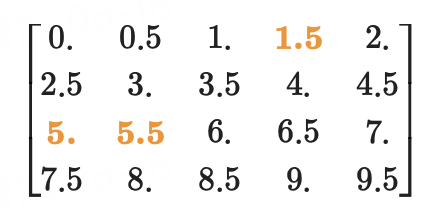

In [38]:
row = [2,2,0]
col = [0,1,3]

In [39]:
array_2D[row, col]

array([5. , 5.5, 1.5])

索引 ndarrays 的另一个特性是返回的数组将具有与包含索引的数组相同的维度。在以下示例中，我们有两个索引数组，其中 `i_flat` 是一个 1 $\times$ 4 数组，而 `i_square` 是一个 2 $\times$ 2 数组，分别得到 1 $\times$ 4 和 2 $\times$ 2 的数组。

In [40]:
threes = np.arange(3, 30, 3)

i_flat = np.array([0, 3,1, 5])
i_square = np.array([[0, 3],
                     [1, 5]])

In [41]:
threes[i_flat]

array([ 3, 12,  6, 18])

In [42]:
threes[i_square]

array([[ 3, 12],
       [ 6, 18]])

后一结果也可以通过使用平铺（即一维）数组进行索引，然后将其重新塑造为所需维度来实现，如下面的示例所示。

In [43]:
i = np.array([0, 3,1, 5])

threes[i].reshape((2,2))

array([[ 3, 12],
       [ 6, 18]])

### 4.3.4 遮罩

通过一个称为*遮罩*的过程，也可以使用布尔数组来选择 NumPy 数组中的元素。遮罩数组是一个布尔数组，填充有 `1` 和 `0` 或 `True` 和 `False`，并且具有与原始数组相同的维度。原始数组中的任何元素，如果在遮罩数组的相应位置有 `1` 或 `True`，则会返回该元素。

例如，

In [44]:
orig_array = np.array([[5, 7, 1],
                       [3, 4, 2],
                       [0, 9, 8]])

mask = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [1, 0, 1]], dtype=bool)

In [45]:
orig_array[mask]

array([7, 3, 4, 2, 0, 8])

需要注意的是，如果在遮罩数组中使用 `1` 和 `0`，则必须包含 `dtype=bool`，否则 NumPy 将把 `1` 和 `0` 当作索引而不是布尔值，并尝试索引。

In [46]:
mask = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [1, 0, 1]])

orig_array[mask]

array([[[5, 7, 1],
        [3, 4, 2],
        [5, 7, 1]],

       [[3, 4, 2],
        [3, 4, 2],
        [3, 4, 2]],

       [[3, 4, 2],
        [5, 7, 1],
        [3, 4, 2]]])

遮罩的真正威力在于通过布尔逻辑（如 `>`、`<=` 或 `==`）生成遮罩数组。这使用户可以通过条件选择数组的元素，如下面的示例所示，我们选择 `orig_array` 中大于 5 的所有元素。

````
如果遮罩数组是由布尔条件生成的，那么生成的遮罩数组将自动成为适合遮罩的布尔数组。
````

In [47]:
cond = orig_array > 5
cond

array([[False,  True, False],
       [False, False, False],
       [False,  True,  True]])

In [48]:
orig_array[cond]

array([7, 9, 8])

我们还可以在方括号中直接包含条件以节省一步操作，如下所示。

In [49]:
orig_array[orig_array > 5]

array([7, 9, 8])

## 4.4 向量化与广播

NumPy 数组相对于列表的一个主要优势是操作会自动在数组之间*向量化*。也就是说，数学运算会通过数组传播，而不需要 `for` 循环。这既加快了计算速度，也使代码更易于阅读和编写。

### 4.4.1 NumPy 函数

让我们使用 NumPy 的 `np.sqrt()` 函数计算平方根。平方根会自动对每个元素进行计算。

In [50]:
squares = np.array([1, 4, 9, 16, 25])

In [51]:
np.sqrt(squares)

array([1., 2., 3., 4., 5.])

执行此操作需要 NumPy 的 `sqrt()` 函数。如果尝试使用数学模块的 `sqrt()` 函数，则会返回一个错误，因为该函数无法对多元素对象进行平方根计算。

In [52]:
import math
math.sqrt(squares)

TypeError: only size-1 arrays can be converted to Python scalars

### 4.4.2 标量与数组

在标量和数组之间进行数学运算时，相同的操作会在数组的每个元素上执行，返回与起始数组相同维度的数组。下面，一个数组乘以标量 3，使得数组中的每个元素都乘以这个值。

$$ 3 \times \left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \end{array} \right] = \left[ \begin{array}{cc} 15 & 18 \\ 21 & 24 \end{array} \right] $$

In [ ]:
3 * np.array([[5, 6], [7, 8]])

array([[15, 18],
       [21, 24]])

在一个 1×1 数组和一个较大数组之间执行类似的操作时，会产生相同的结果。

$$ \left[ \begin{array}{c} 2 \end{array} \right] + \left[ \begin{array}{cc} 10 & 20 \end{array} \right] = \left[ \begin{array}{cc} 12 & 22 \end{array} \right] $$

In [ ]:
np.array([2]) + np.array([10, 20])

array([12, 22])

### 4.4.3 相同维度的数组

如果在相同维度的两个数组之间执行数学运算，则数学运算将在两个数组中的相应元素之间执行。例如，如果一对 2×2 数组相互相加，那么相应的元素将相互相加。这意味着左上角的元素相加，依此类推。

$$ \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] + \left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \end{array} \right] = \left[ \begin{array}{cc} 6 & 8 \\ 10 & 12 \end{array} \right] $$

In [ ]:
a = np.array([[1,2], [3,4]]) 
b = np.array([[5,6], [7,8]]) 
a + b

array([[ 6,  8],
       [10, 12]])

### 4.4.4 不同维度的数组

*广播*是另一种处理不同维度的两个数组之间的数学运算的向量化形式。在广播中，两个数组的某个维度必须相同或者是一维的，否则除了错误信息外什么都不会发生。为了处理不同的维度，NumPy 将维度较少的数组复制出来，使其具有与另一个数组相同的维度。需要指出的是，NumPy 在后台并没有真正地复制数组，但这是一种便于理解的方法。例如，下面是一个 2×2 和一个 1×2 数组之间的加法。

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \end{array} \right]= ? $$

为了使两个数组具有相同的大小，沿着较小的维度复制较小的数组，直到两个数组具有相同的大小，如下所示。然后我们只需进行简单的对应元素之间的数学运算，如 4.4.3 节所述。

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \\ 2 & 2 \end{array} \right]= \left[ \begin{array}{cc} 3 & 4 \\ 5 & 6 \end{array} \right] $$

In [ ]:
a = np.array([[1,2], [3,4]])
b = np.array([2,2])
a + b

NameError: name 'np' is not defined

如果在具有更高维度的数组与标量或 1×1 数组之间执行数学运算，如下所示，会发生什么？您可能已经从[4.4.2 节](4.4.2)中了解到了答案，但是这里是如何合理化这种行为的。在这种情况下，没有相同的维度，但由于两个数组不同的地方之一具有一维的维度，数组仍然可以广播。

$$ \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] \times \left[ \begin{array}{c} 2 \end{array} \right]= ?  $$

再次强调，较小的数组会被复制，直到两个数组具有相同的大小。

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \\ 2 & 2 \end{array} \right]= \left[ \begin{array}{cc} 2 & 4 \\ 6 & 8 \end{array} \right] $$

In [ ]:
a = np.array([[1,2], [3,4]])
b = np.array([2]) 
a * b

array([[2, 4],
       [6, 8]])

最后，如果我们尝试在两个具有不同维度的数组之间执行数学运算，并且两个数组各个维度均不同，则会引起一个报错。

$$
\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{ccc} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{array} \right]= ?
$$

In [ ]:
a = np.array([[1,2], [3,4]])
b = np.array([[1,1,1], [2,2,2], [3,3,3]]) 
a + b

ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

### 4.4.5 向量化 Python 函数

标准的 Python 函数通常被设计为执行一次计算并输出 Python 对象而不是 NumPy 数组。例如，以下函数根据速率常数（`k`）和反应物浓度（`conc`）计算一阶反应的速率。

In [ ]:
def rate(k, conc):
    return k * conc

In [ ]:
rate(1.2, 0.80)

0.96

如果我们尝试使用浓度值列表进行上述计算，会发生什么？

In [ ]:
concs = [0.1, 0.5, 1.0, 1.5, 2.0]

In [ ]:
rate(1.2, concs)

TypeError: can't multiply sequence by non-int of type 'float'

我们会得到一个错误，因为 Python 无法像 NumPy 那样将列表乘以一个值。然而，可以使用 `np.vectorize()` 将上述函数转换为 NumPy 函数，这将允许该函数对一系列值执行计算并返回一个 NumPy 数组。

In [ ]:
vrate = np.vectorize(rate)

In [ ]:
vrate(1.2, concs)

array([0.12, 0.6 , 1.2 , 1.8 , 2.4 ])

## 4.5 数组方法

从技术上讲，本章已经使用了 NumPy 数组方法。上面的函数是专门用于处理 NumPy 数组的 NumPy 方法。如果将数组输入到许多非 NumPy 函数中，将会出现错误，因为它们无法处理多元素对象或特定的数组。有趣的是，如果将浮点数或整数输入到 NumPy 方法中，它仍然会起作用。例如，整数 4 可以输入到 `np.sqrt()` 函数中，也可以输入到值数组中。

In [ ]:
np.sqrt(4)

2.0

In [ ]:
np.sqrt(np.array([1, 4, 9]))

array([1., 2., 3.])

NumPy 包含了大量用于处理数组的方法...以至于在这里列出它们全部是不切实际的。然而，下面的表格列出了一些常见且有用的方法。值得浏览并了解它们；大多数方法都值得记住。如果你发现自己需要以某种复杂的方式操作数组，值得在网络上进行快速搜索并在搜索中包含 "NumPy"。你很可能会找到其他有用的 NumPy 方法或者关于其他人如何解决类似问题的建议。

**表 1** 生成数组的常见方法

| 方法 | 描述 |
|:------: | :---------
|`np.array()` |从其他对象生成数组 |
|`np.arange()` | 使用给定的步长大小从 \[start, stop) 创建数组 |
|`np.linspace()` | 使用给定的步数从 \[start, stop\] 创建数组 |
|`np.empty() ` | 创建一个“空”数组（实际上填充了垃圾） |
|`np.zeros()`| 生成一个填充零的给定维度数组 |
|`np.ones()`| 生成一个填充一的给定维度数组 |
|`np.fromfunction()` | 使用 Python 函数生成一个数组 |
|`np.genfromtxt()` | 将文本文件数据加载到数组中 |
|`np.loadtxt()` | 将文本文件数据加载到数组中（无法处理缺失的数据） |

**表 2** 数组属性方法

| 方法 | 描述 |
|:------:| :--------   |
|`np.shape(array)` | 返回数组的维度 |
|`np.ndim(array)` | 返回维度的数量（例如，一个二维数组是 2） |
|`np.size(array)` | 返回数组中的元素个数 |


**表 3** 数组修改方法

| 方法 | 描述 |
|:------:| :--------   |
|`np.flatten()` | 就地展平数组 |
|`np.ravel()`    | 返回展平数组的视图，而不改变数组 |
|`np.reshape()`  | 就地调整数组形状 |
|`np.resize()`   | 返回调整大小的数组视图，而不修改原始数组 |
|`np.transpose()` | 返回转置数组的视图 |
|`np.vstack()`   | 将数组垂直堆叠到新数组中 |
|`np.hstack()`   | 将数组水平堆叠到新数组中 |
|`np.dstack()`   | 将数组沿着深度方向堆叠到新数组中 |
|`np.vsplit()`   | 垂直分割数组 |
|`np.hsplit()`   | 水平分割数组 |
|`np.dsplit()`   | 沿着深度方向分割数组 |
|`np.meshgrid()` | 创建网格（参见第 3 章的示例） |
|`np.sort()`     | 对数组中的元素进行排序；默认沿最后一个轴 |
|`np.argsort()`  | 返回排序数组的索引值 |
|`np.fill(x)`    | 将数组中的所有值设置为 `x` |
|`np.roll()`     |沿给定轴滚动数组；从数组一端掉落的元素出现在另一端|
|`np.floor()`    | 返回数组中所有元素的 floor（即向下取整）|
|`np.round(x, decimals=y)`    | 将数组 `x` 中的每个数字四舍五入到 `y` 个小数位 | 

**表 4** 数组测量和统计方法

| 方法 | 描述 |
|:-----: | :---------- | 
|`np.min()` |返回数组中的最小值 |
|`np.max()` |返回数组中的最大值|
|`np.argmin()` |返回最小值的参数（即索引）|
|`np.argmax()` |返回最大值的参数（即索引）|
|`np.argrelmax()` |返回局部最大值的参数（即索引）|
|`np.fmin()` |返回两个相同大小数组之间的逐元素最小值|
|`np.fmax()` |返回两个相同大小数组之间的逐元素最大值|
|`np.percentile()` |返回指定的百分位数|
|`np.mean()` |返回平均值（通常称为平均值）|
|`np.median()` |返回中位数|
|`np.std()` |返回标准差；确保包括 `ddof=1`|
|`np.histogram()` |返回直方图的计数和 bins |
|`np.cumprod()` |返回累积乘积|
|`np.cumsum()` |返回累积和 |
|`np.sum()` |返回所有元素的和|
|`np.prod()` |返回所有元素的积|
|`np.ptp()` |返回最大值和最小值之间的峰值间距|
|`np.unique()` | 返回数组中的唯一值 |

```
标准差方程包括自由度。NumPy 的默认值为零，但是 Excel 和其他一些软件的默认值为一。如果你希望你的标准偏差与 Excel 相匹配，请在 `np.std()` 标准偏差函数中包含 `ddof=1` 参数。

## 4.6 缺失数据

实际数据集经常包含空缺或缺失值，因此能够处理缺失数据非常重要。将数据导入NumPy时，有两个常用的函数，`np.genfromtxt()`和`np.loadtxt()`。尽管这两个函数在功能上大致相同，但它们之间有一个关键区别，即`np.genfromtxt()`可以处理缺失数据，而`np.loadtxt()`则不能。这意味着如果你的数据集可能包含空缺，你应该使用`np.genfromtxt()`。

如果数据文件中包含一个空缺，`np.genfromtxt()`函数默认会在该位置放置一个`nan`。`nan`表示"非数值"，仅仅是一个占位符。例如，文件*dHf_ROH.csv*包含了线性醇中的碳原子数量以及每种醇的气相生成热（单位为 kJ/mol）。1-十一烷醇（十一个碳原子）的值缺失，因此`np.genfromtxt()`会在其位置放置一个`nan`。

In [ ]:
!wget https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_04/data/dHf_ROH.csv

In [ ]:
np.genfromtxt('dHf_ROH.csv', delimiter=',')

array([[   1., -205.],
       [   2., -234.],
       [   3., -256.],
       [   4., -277.],
       [   5., -298.],
       [   6., -316.],
       [   7., -340.],
       [   8., -356.],
       [   9., -377.],
       [  10., -395.],
       [  11.,   nan],
       [  12., -437.]])

有些数据文件使用占位符值代替完全没有值的情况。这些占位符通常为`-1`、`0`、`999`或一些物理上无意义或不可能的值。如果你想在缺失数据的位置使用其他值，可以使用`filling_values=`参数来指定。在下面的例子中，缺失值被替换为`999`。

In [ ]:
np.genfromtxt('dHf_ROH.csv', delimiter=',', filling_values=999)

array([[   1., -205.],
       [   2., -234.],
       [   3., -256.],
       [   4., -277.],
       [   5., -298.],
       [   6., -316.],
       [   7., -340.],
       [   8., -356.],
       [   9., -377.],
       [  10., -395.],
       [  11.,  999.],
       [  12., -437.]])

如果你的数据中有缺失值，`nan`占位符在对数据进行统计时可能会引起问题。下面，我们使用`np.mean()`方法尝试计算生成焓的平均值，但由于`np.mean()`函数无法处理占位符，因此得到了一个`nan`。

In [ ]:
dHf = np.genfromtxt('dHf_ROH.csv', delimiter=',')

In [ ]:
np.mean(dHf[:,1])

nan

另外，NumPy有许多专门用于处理缺失值数据的函数版本，如下所示。

| 函数  | 描述 |
|:-----------:|:-------------|
|`np.nanstd()`| 标准差 |
|`np.nanmean()`| 平均值 |
|`np.nanvar()`| 方差 |
|`np.nanmedian()`| 中位数 |
|`np.nanpercentile()`| 第Q个百分位数 |
|`np.nanquantile()`| 第Q个分位数 |

In [ ]:
np.nanmean(dHf[:,1])

-317.3636363636364

In [ ]:
np.nanquantile(dHf[:,1], 0.6)

-298.0

## 4.7 随机数生成

随机模拟是科学领域的常用工具，涉及一系列随机数，因此使用NumPy生成随机数是值得关注的。根据模拟的需求，随机数可能是一系列浮点数或整数，并且可以从不同的值范围生成。这些数也可以以均匀分布的形式生成，其中所有值的概率相等，或者以偏斜的分布生成，其中一些值的概率比其他值更高。下面是NumPy `random`模块中的随机数函数，用于生成适合模拟需求的随机数分布。

```
软件生成的随机数实际上是*伪随机*数。然而，对于大多数化学模拟来说，它们已经非常接近随机数，因此在此将它们称为“随机数”。
```

### 4.7.1 均匀分布

最简单的分布是随机数的*均匀分布*，其中范围内的每个数都有相等的出现概率。由于生成随机数的随机性质，分布在小样本数量时可能并不总是均匀的，但随着生成的样本数量的增加，相对分布将趋于均匀。下面的直方图（图3）是从\[0,1)范围内均匀分布生成的一百个（左）和十万个（右）随机浮点数。虽然右边的图看起来更均匀，但这主要是由于不同的尺度造成的。

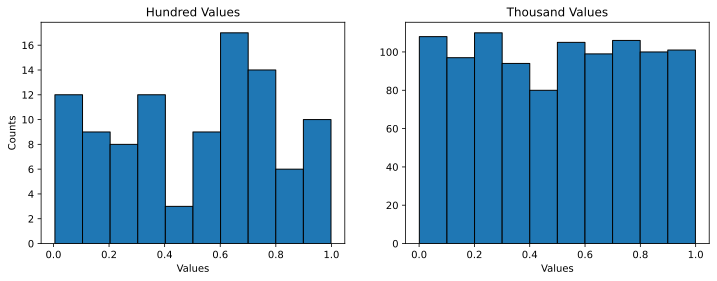

In [ ]:
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=18)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(rng.random(100), edgecolor='k')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('Hundred Values')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(rng.random(1000), edgecolor='k')
ax2.set_xlabel('Values')
ax2.set_title('Thousand Values')
plt.show()

**图3** 使用 `random()` 方法从[0,1)范围内均匀分布生成的一百个（左）和十万个（右）随机浮点数的直方图。

从1.18版本开始，NumPy生成随机值的首选方法是通过使用 `rng = np.random.default_rng()` 函数调用的生成器。创建生成器后，可以使用它来生成所需的随机值。NumPy有多种方法可用于生成均匀分布的随机数，包括以下两个函数，其中 `n` 是要生成的随机值的数量。`rng.random(n)` 函数从范围\[0,1)内生成`n`个随机浮点数。`rng.integers(low, high=, size=n)` 函数在范围\[low, high)内生成随机整数，并可以使用size参数生成多个值。
~~~python
rng = np.random.default_rng()

rng.random(n)

rng.integers(low, high=x, size=n)
~~~

```{warning}
在NumPy 1.18版本之前，随机数是通过类似 `np.random.randint()` 的函数调用生成的。虽然这些仍然有效，但它们被认为是遗留代码，因此不确定它们将继续被支持多久。

In [ ]:
rng = np.random.default_rng()

In [ ]:
# hidden cell
rng = np.random.default_rng(seed=18)

### 4.7.2 二项分布

当值是从两种可能的结果中生成时，就会产生二项分布。这对于诸如确定模拟分子是否发生反应或聚合物链是否终止或传播的应用非常有用。两种结果由 `0` 或 `1` 表示，生成 `1` 的概率为 `p`。二项分布是通过NumPy随机模块中的 `rng.binomial()` 函数调用生成的。

~~~python
rng = np.random.default_rng()

rng.binomial(t, p, size=n)
~~~

`t` 参数是试验次数，而 `size=` 参数是生成值的数量。例如，如果 `t = 2`，则生成两个二项值并返回和，可能是 `0`，`1` 或 `2`。基本概率预测这些和将分别以1:2:1的比率出现。如果 `t` 增加到 `10`，将获得更接近钟形曲线的形状。*伯努利分布* 是二项分布的特定实例，其中 t = 1。下面的直方图（图4）是一百个随机生成的数值的二项分布，其中 `p = 0.5`，`t = 1`（顶部），`t = 2`（左下角）和 `t = 10`（右下角）。

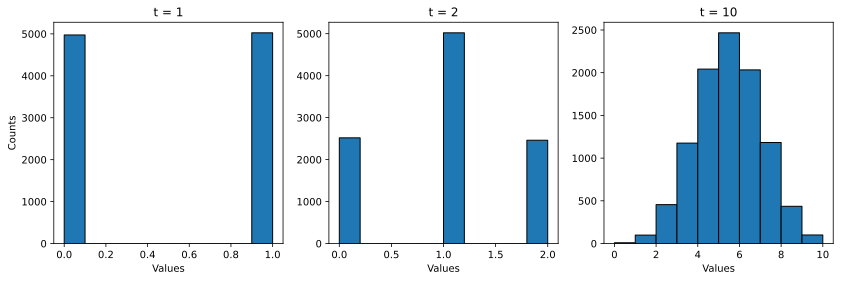

In [ ]:
fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1,3,1)
ax1.hist(rng.binomial(1, p=0.5, size=10000), edgecolor='k')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('t = 1')
ax2 = fig.add_subplot(1,3,2)
ax2.hist(rng.binomial(2, p=0.5, size=10000), edgecolor='k')
ax2.set_xlabel('Values')
ax2.set_title('t = 2')
ax3 = fig.add_subplot(1,3,3)
ax3.hist(rng.binomial(10, p=0.5, size=10000), edgecolor='k')
ax3.set_xlabel('Values')
ax3.set_title('t = 10')
plt.show()

**图4** 一百个随机生成的数的直方图，这些数符合二项分布，其中`p = 0.5`且`t = 1`（顶部），`t = 2`（底部左侧），以及`t = 10`（底部右侧）。

### 4.7.3 泊松分布

*泊松分布* 是表示在已知平均频率  ($\lambda$)  的给定区间（时间或空间）内独立事件发生的概率分布。泊松分布中的每个样本都是在时间区间内发生的事件计数，因此它们总是整数。NumPy 可以使用 `rng.poisson()` 函数生成泊松分布的整数，该函数接受两个参数。

~~~python
rng.poisson(lam=1.0, size=n)
~~~

第一个参数，$\lambda$（`lam`），是生成值的统计均值，第二个参数，`size`，是请求的值的数量。例如，可以通过以下函数调用模拟在已知每秒平均有 3.6 个辐射计数的地点检测背景辐射的盖革计数器。

In [ ]:
# hidden cell
rng = np.random.default_rng(seed=20)

In [ ]:
rng.poisson(lam=3.6, size=30)

array([2, 2, 4, 2, 3, 2, 4, 3, 2, 6, 3, 3, 4, 3, 4, 4, 3, 0, 5, 5, 4, 4,
       8, 2, 2, 3, 7, 4, 4, 5])

返回的值数组是 30 秒内每秒的总辐射检测次数，平均值为 3.8 次。虽然不完全是目标的 3.6 次，但接近且较大的样本量在统计上更可能产生接近目标值的结果。这些值的直方图如下所示（图 5，左）。当此模拟重复进行三万个样本时（图 5，右），获得了 3.61 次的平均值。此外，更多的值会产生一个经典的泊松分布曲线，该曲线类似于一个钟形曲线，但在高端的收缩更多。

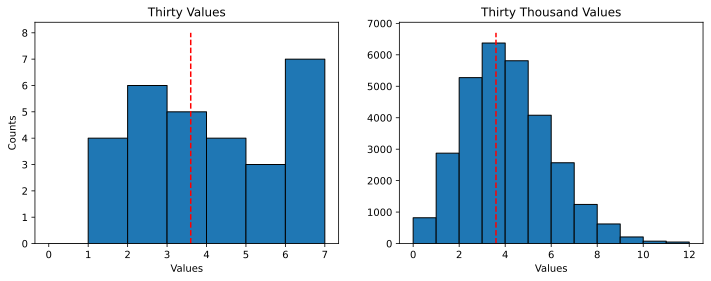

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(rng.poisson(lam=3.6, size=30), bins=range(0,8), edgecolor='k')
ax1.vlines(3.6, 0, 8, 'r', linestyle='dashed')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('Thirty Values')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(rng.poisson(lam=3.6, size=30000), bins=range(0,13), edgecolor='k')
ax2.vlines(3.6, 0, 6700, 'r', linestyle='dashed')
ax2.set_xlabel('Values')
ax2.set_title('Thirty Thousand Values')
plt.show()

**图 5** 目标均值（$\lambda$）为 3.6（虚线红线）的泊松分布中随机生成的三十（左）和三万（右）个整数的直方图。

通过操作上述函数的输出，可以生成随机数的其他分布。例如，在 2D 扩散模拟中有用的 \[-1, 1) 分布的随机数可以通过从范围 \[0, 1) 内的值中减去 0.5 并乘以 2 来生成。

~~~python
rand_float = 2 * (rng.random() - 0.5)
~~~

### 4.7.4 其他函数

NumPy 中的随机模块还包括其他各种随机数和序列生成器。这包括 `rng.normal()`，它在以零为中心的正态分布中生成值。`rng.choice()` 函数从提供的值数组中选择一个随机值，而 `rng.shuffle()` 函数随机化给定数组的值的顺序。其他随机分布函数可以在 SciPy 网站上找到。常见的 NumPy 随机函数总结如表 5。

**表 5** 常见的 NumPy np.random 函数总结

| 函数 | 描述 | 
|:-------: |:----------- |
|`rng.random()`  | 在均匀分布中生成范围为 \[0,1) 的随机浮点数 |
|`rng.integers()` | 在均匀分布中生成给定范围的随机整数 |
|`rng.normal()` | 在以零为中心的正态分布中生成随机浮点数 |
|`rng.binomial()` | 在二项分布中生成随机整数；需要概率 `p` 和 `size` 参数 |
|`rng.poisson()` | 在泊松分布中生成随机浮点数；需要一个目标均值参数（`lam`）  |
|`rng.choice()` | 从一维数组或范围中选择随机值 |
|`rng.shuffle()` | 随机化数组的顺序 |

In [ ]:
rng.random(1)

array([0.29686811])

In [ ]:
rng.integers(0, high=100)

14

In [ ]:
rng.normal(loc=0.0, scale=1.0, size=3)

array([ 0.4697172 , -1.31672361, -1.28933494])

In [ ]:
rng.binomial(2, p=0.5, size=3)

array([2, 1, 2])

In [ ]:
rng.poisson(lam=2.0, size=5)

array([1, 1, 3, 2, 1])

In [ ]:
rng.choice(20, size=3)

array([ 0, 14, 16])

In [ ]:
arr = np.array([0, 1, 2, 3, 4])
rng.shuffle(arr)
arr

array([1, 3, 2, 0, 4])

## 参考
[https://github.com/weisscharlesj/SciCompforChemists](https://github.com/weisscharlesj/SciCompforChemists)

## 练习

1. 生成一个包含前 26 个元素的原子序数的数组。

2. 以下方程定义了光子能量（J）与波长（m）之间的关系，其中 h 是普朗克常数（6.626 $\times \, 10^{-34} J\cdot s$），c 是真空中的光速（2.998 $\times \, 10^8 m/s$）。

    $$ E = \frac{hc}{\lambda} $$

    a. 生成一个包含可见光波长（4.00 $\times 10^{-7}$ m $\rightarrow$ 8.00 $\times 10^{-7}$ m）的数组，以 5 $\times$ $10^{-8}$ m 为增量。

    b. 生成一个包含第 a 部分中每个光波长能量的第二个数组。

3. 生成一个包含 101.325 一百次的数组。

4. 以下数组包含华氏温度。在不使用 for 循环的情况下，将这些值转换为摄氏温度。
    ~~~python
    F = array([0, 32, 100, 212, 451])
    ~~~

5. 生成两个数组，包含以下正弦函数，x = 0 $\rightarrow 10 \pi$ 

    $$ y = sin(x) $$
    $$ y = sin(1.1x + 0.5) $$

    a. 在同一张图上绘制这两个正弦波。

    b. 将两个正弦函数相加并绘制结果。

    c. 解释为什么 b 部分的信号在一个区域较小而在另一个区域较大。提示：观察 a 部分的图表，了解两个原始正弦波是如何相互关联的。

6. 下面显示了 $\Delta G^o$ 和 K（平衡常数）之间的数值关系。在标准温度和压力下，绘制 K 值为 0.001 $\rightarrow$ 1000 的 $\Delta G^o$ 与 K 的图像。使用 NumPy 数组，不要使用任何 for 循环。

    $$ \Delta G = -RTln(k) $$

7. 下面显示了 k（速率常数）与 E$_a$ 之间的数值关系。在标准温度和压力下，绘制活化能为 1 $\rightarrow$ 20 kJ/mol 的 k 与 Ea 的图像。使用 NumPy 数组，不要使用任何 for 循环，并使用 A = 1。注意仔细检查能量单位。
    $$ k = Ae^{-E_a / RT} $$

8. 生成一个包含整数 0 $\rightarrow$ 14（包含）的数组。

    a. 将数组重塑为 3 $\times$ 5 的数组。

    b. 转置数组，现在它应该是一个 5 $\times$ 3 的数组。

    c. 在*不*使用 `reshape()` 方法的情况下，再次使数组变为一维。

9. 生成和组合数组 - Bohr 氢原子。

    a. 创建一个数组，包含氢原子的前八个轨道的主量子数（n）（即 1 $\rightarrow$ 8）。

    b. 使用下面的方程为 Bohr 模型的氢原子生成第二个数组，该数组包含 A 部分中每个轨道的能量（J）。

    $$ E = -2.18 \times 10^{-18}J \frac{1}{n^2} $$

    c. 将 A 和 B 部分的两个数组组合成一个新的 8 $\times$ 2 数组，第一列包含主量子数，第二列包含能量。
    
10. 使用以下代码生成一维数组，并索引数组的第5个元素。

    ~~~python
    arr = np.random.randint(0, high=10, size=10)
    ~~~
    
11. 使用以下代码生成二维数组。
    ~~~python
    arr2 = np.random.randint(0, high=10, size=15).reshape(5, 3)
    ~~~

    a. 索引第三列的第二个元素。

    b. 切片数组以获取整个第三行。

    c. 切片数组以访问整个第一列。

    d. 切片数组以获取第一行的最后两个元素。

    
12. 预测以下两个 NumPy 数组之间操作的结果。测试你的预测。

    $$ \left[ \begin{array}{cc} 1 & 1 \\ 2 & 2 \end{array} \right] + \left[1 \right] = \,\, ?$$

13. 预测以下两个 NumPy 数组之间操作的结果。测试你的预测。

    $$ \left[ \begin{array}{ccc} 1 & 8 & 9 \\ 8 & 1 & 9 \\ 1 & 8 & 1 \end{array} \right] + \left[  \begin{array}{cc} 1     & 1 \\ 1 & 1 \end{array} \right] = \,\, ? $$

14. 请提供要在两个 NumPy 数组之间执行的操作，以便我为您预测结果并对其进行测试。

    $$ \left[ \begin{array}{cc} 1 & 8 \\ 3 & 2 \end{array} \right] + 
    \left[ \begin{array}{cc} 1 & 1 \\ 1 & 1 \end{array} \right] = \,\, ?$$

15. 对于以下随机生成的数组：
    ~~~python
    arr = np.random.rand(20)
    ~~~

    a. 找到以下数组中最大值的*索引*。

    b. 计算数组的平均值。

    c. 计算数组的累积和。

    d. 对数组进行排序。

16. 生成从 -1 $\rightarrow$ 1（不包括）的随机值数组，并计算其中位数值。提示：从 0 $\rightarrow$ 1（不包括）的值数组开始，然后对其进行操作。

17. 生成从 0 $\rightarrow$ 35（包括）的整数随机数组，然后对其进行排序。

18. 氢核可以具有+1/2和-1/2的自旋，并且在大约1：1的比例中出现。模拟六个氢原子分子中+1/2氢核的数量，并绘制分布。提示：由于有两种可能的结果，因此可以使用*二项分布*进行模拟。参见第4.7.2节。